## 주제선정:Titanic 생존자 예측
## 타이타닉 침몰 사고
 여객선 타이타닉호는 1912년 4월 15일 영국에서 출항해  빙산에 충돌해 침몰했고 많은 사망자가 있었다. 

## 데이터 분석 목적
1. 생존과 사망에 영향을 미치는 승객 정보는 무엇이 있는가?

    (그 중 생존률이 가장 높은 승객 정보는 무엇인가?
     그 중 사망률이 가장 높은 승객 정보는 무엇인가?)
   

2. 변수들의 연관성으로 새로운 사실을 도출한다.- 피쳐추출하기


3. 알아낸 사실을 시각화하여 이해를 높인다.


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터 수집

In [3]:
#타이타닉 데이터 가져오기

train= pd.read_csv('titanic/train.csv',index_col=False) #index_col=False 첫 행의 데이터가 열 이름이 된다.
test= pd.read_csv('titanic/test.csv',index_col=False)


## 데이터 셋확인

In [4]:
#호출하여 불러올 수 있는 key값 확인 # train.keys()
#컬럼정보 확인하기.
print(train.columns.values)
print(test.columns.values)#test에는 Survived 없음
print(train.keys())

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
#파일 타입확인하기
print("train",type(train))
print("test",type(test))

train <class 'pandas.core.frame.DataFrame'>
test <class 'pandas.core.frame.DataFrame'>


In [6]:
#데이터 미리보기
train.head(2) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
# 행, 열
print(train.shape ,test.shape)

(891, 12) (418, 11)


In [8]:
#데이터 전반적인 정보 확인
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
# describe -> 통계량 결과 요약  # (include='all') 모든 열 데이터 출력
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
#정형 데이터 => 수치데이터가 있는 열만 결과 확인 
train.describe(None)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# 문자열 포함 데이터 확인 => 해당 값들 수치 데이터로 바꿔주기.
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 데이터 가공

#### 가. 결측치 확인 및 처리 

In [12]:
# 결측치 확인 Ture - 결측치
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# 결측치 개수 확인 T=1 ,F=0
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
# null제외 개수
print(train.count(axis=0))

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


### 함수 만든거 ?@! 

In [15]:
# pd.concat() 데이터프레임을 말그대로 물리적으로 이어 붙여주는 함수
# axis=0이 적용되기 때문에 행방향(위아래)으로 데이터프레임을 이어붙인다.
# 합쳤을 때 열이 없는 행에는 NaN값이 채워진다.
uni = pd.concat([train.drop("Survived",axis=1),test],axis=0)
whole = [train,test,uni]

### 성별 0,1 맵핑 

In [16]:
# 성별 0,1 맵핑 
dic = {"male":0,"female":1}
for dataset in whole:
    dataset["Sex"] = dataset["Sex"].map(dic)
train.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  .

### 정규 표현식 사용하여 Name에서 Title 추출 전처리

In [17]:
#정규 표현식 사용하여 Name에서 Title 추출 전처리
for dataset in whole:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)
train['Title'].value_counts().sort_index()

# 정규표현식: 특정한 규칙을 가진 문자열을 검색하거나 치환하기 위해 사용된다. # [a-zA-Z] : 알파벳 모두
# Dot(.) 메타 문자는 줄바꿈 문자인 \n을 제외한 모든 문자와 매치됨
# +는 앞의 문자를 1번 이상 반복하는 것을 의미
##'( (' ([a-zA-Z]+).')'  띄어쓰기로 시작해 모든 알파벳이 포함된 문자열을 한 번이상 반복하다가 dot(.)으로 마무리하는 문자열이다. 따라서 Mr,Miss 등 영어 호칭이 추출된다
# 문자열 처리법 : expand=True이면 여러 컬럼, False이면 1개 컬럼에 리스트

Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: Title, dtype: int64

In [18]:
dic = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }

for dataset in whole:
    dataset.drop("Name", axis=1,inplace=True)
    dataset["Title"] = dataset["Title"].map(dic)
    dataset.set_index("PassengerId",inplace=True)
whole[0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,4
888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,1


### age

In [19]:
for dataset in whole:
    dataset["Age"].fillna(uni.groupby("Title")["Age"].transform("mean"),inplace=True)
train.info()
## age가 float형이므로 네구간으로 나누고 int형으로 변환하여 메모리 절약


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


In [20]:
## age 사분위수
uni["Age"].describe()

count    1309.000000
mean       29.907391
std        13.197710
min         0.170000
25%        21.774238
50%        30.000000
75%        36.000000
max        80.000000
Name: Age, dtype: float64

In [21]:
'''
0~22
23~29
30~35
35~
'''
for dataset in whole:
    dataset["Agecut"]=pd.qcut(dataset["Age"],4,labels=[0,1,2,3])
    dataset.drop("Age",axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Agecut
PassengerId,,,,,,,,,,,
1,0,3,0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,1,1,0,PC 17599,71.2833,C85,C,2,3
3,1,3,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
4,1,1,1,1,0,113803,53.1000,C123,S,2,2
5,0,3,0,0,0,373450,8.0500,NaN,S,0,2


### Fare

In [22]:
for dataset in whole:
    dataset["Fare"].fillna(uni.groupby("Pclass")["Fare"].transform("mean"), inplace=True)
uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    1309 non-null   int64   
 1   Sex       1309 non-null   int64   
 2   SibSp     1309 non-null   int64   
 3   Parch     1309 non-null   int64   
 4   Ticket    1309 non-null   object  
 5   Fare      1309 non-null   float64 
 6   Cabin     295 non-null    object  
 7   Embarked  1307 non-null   object  
 8   Title     1309 non-null   int64   
 9   Agecut    1309 non-null   category
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 136.0+ KB


In [23]:
for dataset in whole:
    dataset["Farecut"] = pd.cut(dataset["Fare"],4,labels=[0,1,2,3])
    dataset.drop("Fare",axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,Agecut,Farecut
PassengerId,,,,,,,,,,,
1,0,3,0,1,0,A/5 21171,NaN,S,0,1,0
2,1,1,1,1,0,PC 17599,C85,C,2,3,0
3,1,3,1,0,0,STON/O2. 3101282,NaN,S,1,1,0
4,1,1,1,1,0,113803,C123,S,2,2,0
5,0,3,0,0,0,373450,NaN,S,0,2,0


### 테이블 drop

In [24]:
# 테이블 drop
for dataset in whole:
    dataset.drop(labels="Cabin",axis=1,inplace=True)
    dataset.drop(labels="Ticket",axis=1,inplace=True)
    

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int64   
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Embarked  889 non-null    object  
 6   Title     891 non-null    int64   
 7   Agecut    891 non-null    category
 8   Farecut   891 non-null    category
dtypes: category(2), int64(6), object(1)
memory usage: 57.8+ KB


In [25]:
train.dropna(axis=0,inplace=True)

#### 승선항

In [26]:
dic2 = {"S": 0, "C": 1, "Q": 2}
train.loc[:,"Embarked"] = train.loc[:,"Embarked"].map(dic2)
test.loc[:,"Embarked"] = test.loc[:,"Embarked"].map(dic2)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7020\3364441837.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:,"Embarked"] = train.loc[:,"Embarked"].map(dic2)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_7020\3364441837.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:,"Embarked"] = test.loc[:,"Embarked"].map(dic2)


### 필요한 데이터 추출

In [27]:
# 상관관계 확인하기.
train.corr

<bound method DataFrame.corr of              Survived  Pclass  Sex  SibSp  Parch  Embarked  Title Agecut  \
PassengerId                                                                
1                   0       3    0      1      0         0      0      1   
2                   1       1    1      1      0         1      2      3   
3                   1       3    1      0      0         0      1      1   
4                   1       1    1      1      0         0      2      2   
5                   0       3    0      0      0         0      0      2   
...               ...     ...  ...    ...    ...       ...    ...    ...   
887                 0       2    0      0      0         0      4      1   
888                 1       1    1      0      0         0      1      0   
889                 0       3    1      1      2         0      1      0   
890                 1       1    0      0      0         1      0      1   
891                 0       3    0      0      0        

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7020\3546779028.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),linewidths=0.1,vmax=0.9, cmap=colormap, linecolor='white',annot=True)


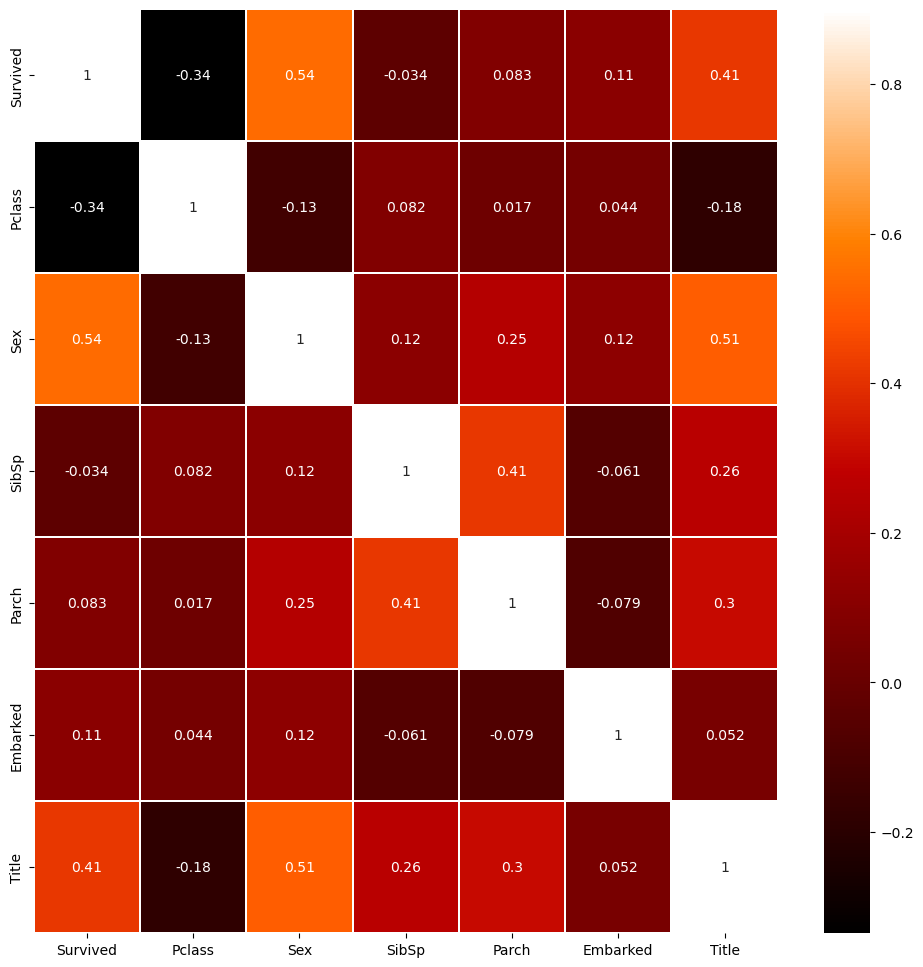

In [29]:
# 시각화
# heatmap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
colormap = plt.cm.gist_heat   #그래프의 색상 구성.
plt.figure(figsize=(12,12))   #그래프의 크기.

# 그래프의 속성을 결정합니다. vmax의 값을 0.9로 지정해 0.9에 가까울 수록 밝은 색으로 표시.
sns.heatmap(train.corr(),linewidths=0.1,vmax=0.9, cmap=colormap, linecolor='white',annot=True)
plt.show()


In [30]:
# Survived과 Pclass 서로 관계높음
# Pclass과 Fare 서로 관계높음
# Age과 Pclass 서로 관계높음
# SibSp과 Parch 서로 관계높음

In [31]:
for dataset in whole:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1


In [32]:
for dataset in whole:
    dataset["IsAlone"] = 0 # 동반자가 있음
    dataset.loc[dataset["FamilySize"] == 1, "IsAlone"] = 1 # familysize 가 1이면 동반 x



   FamilySize  Survived
0           1  0.300935
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


Text(0.5, 0, 'FamilySize')

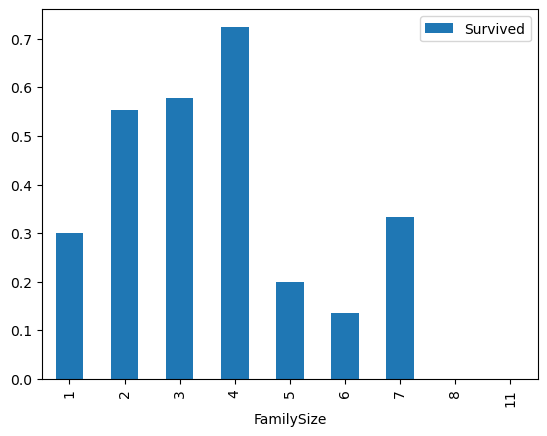

In [33]:
pcs=train[['FamilySize', "Survived"]].groupby(['FamilySize'], as_index=False).mean()
print(pcs)
pcs.plot('FamilySize',kind='bar').set_xlabel('FamilySize')


In [34]:
# 테이블 drop
for dataset in whole:
    dataset.drop(labels="SibSp",axis=1,inplace=True)
    dataset.drop(labels="Parch",axis=1,inplace=True)

In [35]:
label = train["Survived"]
train.drop("Survived", axis=1, inplace=True)
train.head()

,Pclass,Sex,Embarked,Title,Agecut,Farecut,FamilySize,IsAlone
PassengerId,,,,,,,,
1,3,0,0,0,1,0,2,0
2,1,1,1,2,3,0,2,0
3,3,1,0,1,1,0,1,1
4,1,1,0,2,2,0,2,0
5,3,0,0,0,2,0,1,1


In [36]:
train.set_index("Title")
train.head()

,Pclass,Sex,Embarked,Title,Agecut,Farecut,FamilySize,IsAlone
PassengerId,,,,,,,,
1,3,0,0,0,1,0,2,0
2,1,1,1,2,3,0,2,0
3,3,1,0,1,1,0,1,1
4,1,1,0,2,2,0,2,0
5,3,0,0,0,2,0,1,1


### 모델학습을 위한 준비

### 모델 생성

In [37]:
from sklearn.tree import DecisionTreeClassifier # GridSearchCV 
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.model_selection import cross_validate # 교차검증
from sklearn.metrics import confusion_matrix # 분류성능평가지표 
from sklearn.metrics import accuracy_score # 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### RandomForest 예측

In [38]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
clf = RandomForestClassifier(random_state=1)
clf.fit(train, label)
pred = clf.predict(train)
accuracy = accuracy_score(train, label)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy)) #소수점 4자리까지표현

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [ ]:
# RandomForest의 하이퍼 파라미터 default 상태
model = RandomForestClassifier()
model

### GridSearchCV를 통한 랜덤포레스트의 하이퍼 파라미터 튜닝¶

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# params = {'n_estimators': range(2,100,10), # 결정트리의 갯수 지정
#           'min_samples_split': range(2,10,2), # 노드분할 최소 샘플데이터수 과적합제어에사용
#           'min_samples_leaf': range(1,4,2), #리프노드가 되기 위해 필요한 최소한의 샘플 데이터수 과적합제어용도 불균형데이터의경우 데이터작아질 수 있으므로 작게 설정 필요
#           'max_features': range(1,20,5), # 최적이 분할을 위해 고려할 최대 feature 개수          
#           'max_depth': range(1,10,2), # 트리의 최대깊이 깊이가 깊어지면 과적합될수있음
#           'max_leaf_nodes': range(1,50,5)} # 리프노드의 최대 개수   

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# clf = RandomForestClassifier(random_state=1, n_jobs= -1)
# gs =GridSearchCV(clf, param_grid=params, scoring="accuracy", n_jobs=-1, refit=True, cv=3, verbose=1)

# gs.fit(X_train, y_train)

# print('최적 하이퍼 파라미터: ', gs.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(gs.best_score_))

# # 최적 하이퍼 파라미터:  {'max_depth': 7, 'max_features': 11, 'max_leaf_nodes': 21, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 92}
# # 최고 예측 정확도: 0.8371

### 파라미터 조정후 RandomForest

In [ ]:
clf = RandomForestClassifier(n_estimators=92,
                             min_samples_split=2,
                            min_samples_leaf=3,
                            max_features=11,
                            max_depth=7,
                            max_leaf_nodes=21,
                            random_state=1,
                            n_jobs= -1)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy)) 
#랜덤 포레스트 정확도: 0.8436

### 분류 성능평가지표 오차행렬로  예측성능을 평가

In [ ]:
def performance_matrix(y_test, pred):
    clf = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print("오차행렬")
    print(clf)
    ### f1 score: 정밀도와 재현율이 trade off 관계이기 때문에 두개의 조화가 매우 중요. 얼마나 잘 조화되는지를 알려주는 함수이다.
    f1 = f1_score(y_test, pred)
    print("정확도: {}".format(accuracy))
    print("정밀도: {}".format(precision))
    print("재현율: {}".format(recall))
    print("f1_score: {}".format(f1))



In [ ]:
performance_matrix(y_test, pred)